### Load libraries

In [16]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
import seaborn as sns
import matplotlib.pyplot as plt
import researchpy as rp
import numpy as np

In [2]:
data = pd.read_excel('data.xlsx', sheet_name = 'Yusipang')
data.head()

,Irrigation,Manure,Replication,PlantHeight,StemsPerPlant,StemDiameter,FreshWeight,DryWeight,StandingPlants
0,I1,M1,1,45.200000,8.400000,9.100,31.200000,5.82,5
1,I1,M2,1,28.333333,5.666667,3.540,4.666667,0.80,3
2,I1,M3,1,43.333333,6.666667,6.370,17.333333,3.40,3
3,I1,M4,1,29.500000,5.500000,3.295,4.000000,0.65,2
4,I2,M1,1,52.700000,7.600000,10.498,41.000000,7.66,6


In [3]:
# Fresh Yield Calculations (ton/acre)
data['FreshPlot'] = data['FreshWeight'] * data['StandingPlants']
data['FreshYield'] = (data['FreshPlot']/2*4047)/1000000

In [4]:
# Dry Yield Calculations (ton/acre)
data['DryPlot'] = data['DryWeight'] * data['StandingPlants']
data['DryYield'] = (data['DryPlot']/2*4047)/1000000

In [5]:
# Fresh to dry weight ratio
data['FDR'] = data['FreshWeight']/data['DryWeight']

In [6]:
data.head()

,Irrigation,Manure,Replication,PlantHeight,StemsPerPlant,StemDiameter,FreshWeight,DryWeight,StandingPlants,FreshPlot,FreshYield,DryPlot,DryYield,FDR
0,I1,M1,1,45.200000,8.400000,9.100,31.200000,5.82,5,156.0,0.315666,29.10,0.058884,5.360825
1,I1,M2,1,28.333333,5.666667,3.540,4.666667,0.80,3,14.0,0.028329,2.40,0.004856,5.833333
2,I1,M3,1,43.333333,6.666667,6.370,17.333333,3.40,3,52.0,0.105222,10.20,0.020640,5.098039
3,I1,M4,1,29.500000,5.500000,3.295,4.000000,0.65,2,8.0,0.016188,1.30,0.002631,6.153846
4,I2,M1,1,52.700000,7.600000,10.498,41.000000,7.66,6,246.0,0.497781,45.96,0.093000,5.352480


In [7]:
#Descriptive statistics of the whole dataset
data.describe()

,Replication,PlantHeight,StemsPerPlant,StemDiameter,FreshWeight,DryWeight,StandingPlants,FreshPlot,FreshYield,DryPlot,DryYield,FDR
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,2.000000,50.238368,7.302778,8.688917,37.827083,7.415208,6.562500,258.625000,0.523328,50.882083,0.102960,5.208867
std,0.825137,9.282926,0.999399,2.258908,17.143681,3.484054,2.061875,152.168471,0.307913,30.521712,0.061761,0.570907
min,1.000000,28.333333,5.200000,3.295000,4.000000,0.650000,2.000000,8.000000,0.016188,1.300000,0.002631,4.120482
25%,1.000000,43.983333,6.575000,7.383500,25.900000,5.525000,5.000000,168.650000,0.341263,32.385000,0.065531,4.769776
50%,2.000000,52.050000,7.375000,8.909000,38.500000,7.700000,7.000000,231.800000,0.469047,49.520000,0.100204,5.224548
75%,3.000000,57.400000,8.200000,9.668500,45.000000,9.401250,8.000000,344.400000,0.696893,66.620000,0.134806,5.671156
max,3.000000,64.700000,9.200000,14.242000,85.000000,18.280000,10.000000,680.000000,1.375980,146.240000,0.295917,6.417910


<AxesSubplot:xlabel='Irrigation', ylabel='PlantHeight'>

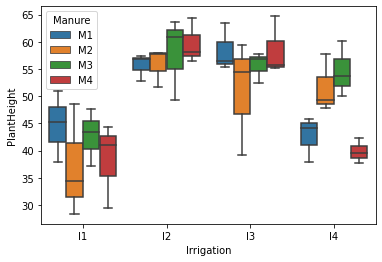

In [8]:
sns.boxplot(x = 'Irrigation', y='PlantHeight', hue='Manure', data = data)

In [9]:
# 2 way ANOVA
model = ols('PlantHeight ~ C(Irrigation) + C(Manure) + C(Irrigation):C(Manure)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Irrigation),2186.437678,3.0,20.185690,1.580572e-07
C(Manure),113.495965,3.0,1.047821,3.848345e-01
C(Irrigation):C(Manure),594.810534,9.0,1.830475,1.008520e-01
Residual,1155.373009,32.0,NaN,NaN


In [18]:
np.mean(data['DryYield'])

0.102959895625

In [10]:
## Mean of Irrigation interval treatments
data.groupby(['Irrigation']).mean()

,Replication,PlantHeight,StemsPerPlant,StemDiameter,FreshWeight,DryWeight,StandingPlants,FreshPlot,FreshYield,DryPlot,DryYield,FDR
Irrigation,,,,,,,,,,,,
I1,2.0,40.661806,6.423611,6.489167,21.433333,3.886667,5.583333,127.516667,0.258030,23.011667,0.046564,5.587686
I2,2.0,57.241667,7.800000,10.171167,48.666667,9.656667,7.333333,363.116667,0.734767,71.996667,0.145685,5.089562
I3,2.0,55.891667,7.733333,8.964167,41.666667,8.591667,7.500000,310.716667,0.628735,63.966667,0.129437,4.857200
I4,2.0,47.158333,7.254167,9.131167,39.541667,7.525833,5.833333,233.150000,0.471779,44.553333,0.090154,5.301019


In [11]:
## Standard deviation of irrigation interval treatments

data.groupby('Irrigation').std()

,Replication,PlantHeight,StemsPerPlant,StemDiameter,FreshWeight,DryWeight,StandingPlants,FreshPlot,FreshYield,DryPlot,DryYield,FDR
Irrigation,,,,,,,,,,,,
I1,0.852803,7.333807,1.029329,2.227644,13.043316,2.325512,2.429303,94.981317,0.192195,16.373458,0.033132,0.447803
I2,0.852803,4.493725,0.687552,1.615172,13.898419,3.124622,1.435481,146.443100,0.296328,30.894640,0.062515,0.452584
I3,0.852803,6.376727,0.919816,1.788704,15.901134,3.112888,1.243163,121.711207,0.246283,23.917227,0.048397,0.422818
I4,0.852803,7.401653,0.756024,1.749299,14.106169,2.533207,2.329000,139.010873,0.281289,24.931269,0.050448,0.701599


In [12]:
## Mean of manure treatments
data.groupby(['Manure']).mean()

,Replication,PlantHeight,StemsPerPlant,StemDiameter,FreshWeight,DryWeight,StandingPlants,FreshPlot,FreshYield,DryPlot,DryYield,FDR
Manure,,,,,,,,,,,,
M1,2.0,50.314583,7.370833,8.768250,37.666667,7.310833,6.583333,248.283333,0.502401,48.213333,0.097560,5.154090
M2,2.0,48.844444,7.368056,8.367750,36.451389,6.983750,6.500000,258.250000,0.522569,49.256667,0.099671,5.325645
M3,2.0,52.719444,7.255556,9.081167,39.511111,8.155000,6.833333,276.633333,0.559768,57.086667,0.115515,4.962959
M4,2.0,49.075000,7.216667,8.538500,37.679167,7.211250,6.333333,251.333333,0.508573,48.971667,0.099094,5.392772


In [13]:
## Standard deviation of Manure Rate treatments
data.groupby(['Manure']).std()

,Replication,PlantHeight,StemsPerPlant,StemDiameter,FreshWeight,DryWeight,StandingPlants,FreshPlot,FreshYield,DryPlot,DryYield,FDR
Manure,,,,,,,,,,,,
M1,0.852803,8.123300,0.789263,1.187620,10.017560,1.822284,1.311372,87.622017,0.177303,16.341635,0.033067,0.405712
M2,0.852803,10.077589,1.113745,2.610022,18.011399,3.528033,2.713602,194.283095,0.393132,36.961970,0.074793,0.491537
M3,0.852803,7.746964,0.983843,2.485287,20.006612,4.188244,1.585923,161.875706,0.327555,34.070124,0.068941,0.727616
M4,0.852803,11.415490,1.189983,2.662907,20.628681,4.206964,2.534609,163.646411,0.331139,33.611397,0.068013,0.579639


In [14]:
data.groupby(['Irrigation', 'Manure']).std()

Replication  PlantHeight  StemsPerPlant  StemDiameter  \
Irrigation Manure                                                          
I1         M1              1.0     6.556438       1.003743      1.333505   
           M2              1.0    10.346569       0.517830      1.723921   
           M3              1.0     5.280607       1.209836      2.260741   
           M4              1.0     7.769384       1.011599      2.761552   
I2         M1              1.0     2.523886       0.503322      0.534001   
           M2              1.0     3.608786       0.642910      1.105419   
           M3              1.0     7.615992       0.808290      3.008765   
           M4              1.0     4.101626       0.808290      1.747016   
I3         M1              1.0     4.371499       1.137248      1.078566   
           M2              1.0    10.576546       0.305505      1.936719   
           M3              1.0     2.779089       1.171893      0.847104   
           M4              1.0     5.346338       0.702377      2.525293   
I4         M1              1.0     4.176522       0.808290      1.290213   
           M2              1.0     5.403780       0.826136      1.127300   
           M3              1.0     5.109795       0.702377      2.152298   
           M4              1.0     2.268443       0.964365      1.033755   

                   FreshWeight  DryWeight  StandingPlants   FreshPlot  \
Irrigation Manure                                                       
I1         M1         5.828665   0.955981        2.081666   26.777105   
           M2        11.206017   1.904941        2.000000   57.538277   
           M3        17.121959   2.596100        2.645751  159.130303   
           M4        15.634577   2.899695        4.041452  109.623598   
I2         M1         3.557152   0.561070        1.154701   73.022736   
           M2         9.646416   2.333152        2.309401  178.294251   
           M3        24.025264   5.228588        1.732051  238.242006   
           M4        12.434361   2.259469        0.000000   99.474888   
I3         M1         7.989994   1.950487        1.000000   90.919965   
           M2        11.910220   2.732935        2.081666  156.794048   
           M3         7.925486   1.433922        1.154701   35.171769   
           M4        20.151758   4.238726        0.000000  141.062303   
I4         M1        16.916658   2.879606        1.000000  112.396678   
           M2        10.858522   1.641572        3.605551  237.702587   
           M3        15.646512   1.536923        0.577350   73.554424   
           M4        12.654676   1.729222        3.055050   67.370716   

                   FreshYield    DryPlot  DryYield       FDR  
Irrigation Manure                                             
I1         M1        0.054183   6.562022  0.013278  0.219389  
           M2        0.116429   9.841301  0.019914  0.248965  
           M3        0.322000  24.322730  0.049217  0.658604  
           M4        0.221823  20.600728  0.041686  0.450719  
I2         M1        0.147762  10.330460  0.020904  0.312813  
           M2        0.360778  36.509891  0.073878  0.325333  
           M3        0.482083  50.922833  0.103042  0.318019  
           M4        0.201287  18.075752  0.036576  0.322968  
I3         M1        0.183977  20.916255  0.042324  0.188796  
           M2        0.317273  32.358506  0.065477  0.600889  
           M3        0.071170   4.079265  0.008254  0.335080  
           M4        0.285440  29.671084  0.060039  0.388119  
I4         M1        0.227435  17.692545  0.035801  0.529622  
           M2        0.480991  39.960240  0.080860  0.654802  
           M3        0.148837   4.407917  0.008919  0.831842  
           M4        0.136325  11.115005  0.022491  0.472751